<a href="https://colab.research.google.com/github/lemilio-lubu/prediccion-carros/blob/master/Proyecto_Predicci%C3%B3nPreciosCarros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Predicción Precios Carros**
   1. [x] **Bibliotecas**
   2. [x] **Analisis de la base de datos**  

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, r2_score
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import SMOTE
import missingno as msno
import keras
import datetime as dt
import re
import io


In [ ]:
df = pd.read_csv('BaseDeDatosCarrosEC.csv', sep=';')

<ipython-input-967-5e9d9571e08b>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseDeDatosCarrosEC.csv', sep=';')


In [ ]:
df

,CATEGORÍA,CÓDIGO DE VEHÍCULO,TIPO TRANSACCIÓN,MARCA,MODELO,PAÍS,AÑO MODELO,CLASE,SUB CLASE,TIPO,...,FECHA PROCESO (DD/MM/AA),TIPO SERVICIO,CILINDRAJE,TIPO COMBUSTIBLE,FECHA COMPRA (DD/MM/AA),CANTÓN,COLOR 1,COLOR 2,PERSONA NATURAL - JURÍDICA,KILOMETRAJE
0,646088.0,8546301.0,IMPORTACIÓN DIRECTA,JEEP,COMPASS AC 2.4 5P 4X4 TM,MEXICO,2020,JEEP,JEEP,LIVIANO,...,28-dic-22,PAR,2400,GASOLINA,21-dic-22,20502.0,NEG,NEG,NATURAL,33417
1,645791.0,8388387.0,COMPRA LOCAL,MERCEDES BENZ,SPRINTER 315 CDI STANDARD TECHO ELEVADO AMBULA...,ALEMANIA,2023,ESPECIAL,AMBULANCIA,LIVIANO,...,14-dic-22,PAR,2143,DIESEL,14-dic-22,22301.0,BLA,BLA,JURÍDICA,66586
2,645789.0,8282241.0,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,...,28-jul-22,ALQ,12913,DIESEL,5-oct-22,20101.0,PLA,NEG,JURÍDICA,56341
3,645789.0,8282241.0,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,...,6-oct-22,ALQ,12913,DIESEL,5-oct-22,20101.0,PLA,NEG,JURÍDICA,27269
4,645789.0,8282241.0,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,...,12-oct-22,ALQ,12913,DIESEL,5-oct-22,20101.0,PLA,NEG,JURÍDICA,85694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639915,NaN,NaN,NaN,GREAT WALL,WINGLE 5CS,NaN,2025,NaN,CAMIONETA CABINA SIMPLE,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,BLANCO,NaN,NaN,0
639916,NaN,NaN,NaN,JMC,VIGUS PLUS,NaN,2025,NaN,CAMIONETA DOBLE CABINA,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,BLANCO,NaN,NaN,0
639917,NaN,NaN,NaN,FOTON,TUNDLAND M,NaN,2025,NaN,CAMIONETA DOBLE CABINA,NaN,...,NaN,NaN,2.022.163.823.879.410,NaN,NaN,NaN,BLANCO,NaN,NaN,0
639918,NaN,NaN,NaN,JAC,T9,NaN,2025,NaN,CAMIONETA DOBLE CABINA,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,BLANCO,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639920 entries, 0 to 639919
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CATEGORÍA                   629524 non-null  float64
 1   CÓDIGO DE VEHÍCULO          629524 non-null  float64
 2   TIPO TRANSACCIÓN            629524 non-null  object 
 3   MARCA                       639920 non-null  object 
 4   MODELO                      639920 non-null  object 
 5   PAÍS                        630098 non-null  object 
 6   AÑO MODELO                  639920 non-null  int64  
 7   CLASE                       629524 non-null  object 
 8   SUB CLASE                   639920 non-null  object 
 9   TIPO                        629524 non-null  object 
 10  AVALÚO                      639920 non-null  float64
 11  FECHA PROCESO (DD/MM/AA)    629524 non-null  object 
 12  TIPO SERVICIO               629524 non-null  object 
 13  CILINDRAJE    

In [ ]:
# Analisis de los datos que presenta cada columna
for columna in df.columns:
   print(df[columna].unique(), ' ', columna)

[646088. 645791. 645789. ... 330371. 330369. 330368.]   CATEGORÍA
[8546301. 8388387. 8282241. ... 7999932. 7999946. 7999965.]   CÓDIGO DE VEHÍCULO
['IMPORTACIÓN DIRECTA' 'COMPRA LOCAL']   TIPO TRANSACCIÓN
['JEEP' 'MERCEDES BENZ' 'HINO' 'KENWORTH' 'CHEVROLET' 'NISSAN' 'AUDI'
 'LONCIN' 'SINOTRUK' 'RANGER' 'SKYWELL' 'TOYOTA' 'JMC' 'VOLKSWAGEN'
 'HONDA' 'KIA' 'YAMAHA' 'VOLVO' 'SCANIA' 'DAF' 'CADILLAC' 'DUKARE' 'MG'
 'SHINERAY' 'TUKO' 'MAZDA' 'TEKNO' 'HYUNDAI' 'FORD' 'KEEWAY' 'IVECO'
 'JIAYUAN' 'T-RIDE' 'JAC' 'DONGFENG' 'Z1' 'ICS' 'FUSO' 'ELECTRIC HOUSE'
 'RAM' 'GAC' 'FACTORY BIKE' 'HUANGHAI' 'SUBARU' 'OPEL' 'JETOUR'
 'HUSQVARNA' 'CHERY' 'VESPA' 'PEUGEOT' 'DAYTONA' 'BMW' 'HERO' 'CLW-25M'
 'UD TRUCKS' 'ROYAL ENFIELD' 'GMC' 'DODGE' 'CFMOTO' 'MOTO MORINI'
 'MITSUBISHI' 'LEXUS' 'PORSCHE' 'SUZUKI' 'FAW' 'FREIGHTLINER' 'GEELY'
 'HONGQI' 'FANG POWER' 'ZITRO' 'IGM' 'FOTON' 'STIFF 150' 'MASERATI'
 'MAXUS' 'KTM' 'MZ BIKES' 'WULING HONGGUANG' 'PETERBILT' 'THUNDER'
 'RENAULT' 'HAVAL' 'CORONEL' 'SENKE' 

In [ ]:
df['AVALÚO'] = df['AVALÚO'].str.replace('.', '')
df['AVALÚO'] = df['AVALÚO'].str.replace(',', '.')
df['AVALÚO'] = df['AVALÚO'].astype(float)

# **Columna Modelo**
  1. [X] Trabajo en la columna modelo
  2. [X] Obtención tracción
  3. [X] Obtención puertas
  4. [X] Obtención transmisión
  5. [X] Generacion de la columna "MODELO CAR"

> ***!IMPORTANTE***

> Dato no numerico, pero de aqui no hagas mapeo


In [ ]:
df = df.astype({'MODELO': 'string[pyarrow]'}) # Cambio a string
df['MODELO'] = df['MODELO'].str.upper() # Todo a MAYUSCULA

In [ ]:
df_le = df.copy()

In [ ]:
def extraer_info_vehiculo(modelo):
    patrones = {
        'NUM PUERTAS': r'([1-6])P',
        'TRACCION': r'(4X2|4X4)',
        'TRANSMISION': r'(TM|TA|T/A)'
    }

    return {key: (m.group(1) if (m := re.search(patron, modelo)) else None) for key, patron in patrones.items()}

In [ ]:
df_info = df_le['MODELO'].apply(extraer_info_vehiculo).apply(pd.Series)

In [ ]:
df_le = df_le.join(df_info)

In [ ]:
df_le['TRANSMISION'].unique()

array(['TM', 'TA', None, 'T/A'], dtype=object)

In [ ]:
df_le['TRACCION'].unique()

array(['4X4', '4X2', None], dtype=object)

In [ ]:
df_le['NUM PUERTAS'].unique()

array(['5', '2', None, '4', '3', '1', '6'], dtype=object)

In [ ]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639920 entries, 0 to 639919
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CATEGORÍA                   629524 non-null  float64
 1   CÓDIGO DE VEHÍCULO          629524 non-null  float64
 2   TIPO TRANSACCIÓN            629524 non-null  object 
 3   MARCA                       639920 non-null  object 
 4   MODELO                      639920 non-null  string 
 5   PAÍS                        630098 non-null  object 
 6   AÑO MODELO                  639920 non-null  int64  
 7   CLASE                       629524 non-null  object 
 8   SUB CLASE                   639920 non-null  object 
 9   TIPO                        629524 non-null  object 
 10  AVALÚO                      639920 non-null  float64
 11  FECHA PROCESO (DD/MM/AA)    629524 non-null  object 
 12  TIPO SERVICIO               629524 non-null  object 
 13  CILINDRAJE    

In [ ]:
def extraer_nombre_modelo(modelo):
    # Expresión regular para encontrar el patrón deseado
    patron = r'^(.*?)(?=\d[1-6]P|4X[24]| AC| TM| TA| T/A)'

    # Buscar el patrón en el texto
    coincidencia = re.search(patron, modelo)

    # Si se encuentra una coincidencia, se devuelve la parte del nombre
    if coincidencia:
        return coincidencia.group(1).strip()
    else:
        return modelo

In [ ]:
df_le['MODELO CAR'] = df_le['MODELO'].apply(extraer_nombre_modelo)

# **IMPUTACION PUERTAS**

  >  ***NOTA***

  > DATO NUMERICO

In [ ]:
df_le['NUM PUERTAS'] = df_le['NUM PUERTAS'].astype(float)

In [ ]:
all_models = df_le['MODELO CAR'].unique()

In [ ]:
var_num_puerta = df_le.pivot_table(values='NUM PUERTAS',
                                    index='MODELO CAR',
                                    aggfunc=lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

In [ ]:
var_num_puerta = var_num_puerta.reindex(all_models, fill_value=None)

In [ ]:
val_perdidos = df_le['NUM PUERTAS'].isnull()
df_le.loc[val_perdidos, 'NUM PUERTAS'] = df_le.loc[val_perdidos, 'MODELO CAR'].apply(lambda x: var_num_puerta.loc[x].values[0] if x in var_num_puerta.index else None)

In [ ]:
media_entero = int(df_le['NUM PUERTAS'].mean())
df_le['NUM PUERTAS'] = df_le['NUM PUERTAS'].fillna(media_entero).astype(int)


In [ ]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639920 entries, 0 to 639919
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CATEGORÍA                   629524 non-null  float64
 1   CÓDIGO DE VEHÍCULO          629524 non-null  float64
 2   TIPO TRANSACCIÓN            629524 non-null  object 
 3   MARCA                       639920 non-null  object 
 4   MODELO                      639920 non-null  string 
 5   PAÍS                        630098 non-null  object 
 6   AÑO MODELO                  639920 non-null  int64  
 7   CLASE                       629524 non-null  object 
 8   SUB CLASE                   639920 non-null  object 
 9   TIPO                        629524 non-null  object 
 10  AVALÚO                      639920 non-null  float64
 11  FECHA PROCESO (DD/MM/AA)    629524 non-null  object 
 12  TIPO SERVICIO               629524 non-null  object 
 13  CILINDRAJE    

# **ANALISIS ELIMINACION**

CONSIDEREMOS DE IGUAL MANERA CATEGORIA Y CODIGO DE VEHICULO SON IDENTIFICADORES QUE NO PRESENTAN MILLONES DE DATOS CADA IDENTIFICADOR POR TANTO SE LE HACE DROP

SE CONSIDERA QUE LOS CARROS PRESENTAN UNICAMENTE UN COLOR POR VENTA Y COMPRA

CONSIDEREMOS QUE EL NUMERO DE PUERTAS PRESENTA MENOS DEL 50 % DE DATOS COMO PARA IMPUTAR

In [ ]:
df_le = df_le.drop(['CATEGORÍA', 'CÓDIGO DE VEHÍCULO', 'MODELO','COLOR 2'], axis=1)

# IMPUTACION TIPO SERVICIO
> ### ***NOTA***
> DATO NO NUMERICO

In [ ]:
df_le['TIPO SERVICIO'].unique()

array(['PAR', 'ALQ', nan], dtype=object)

In [ ]:
dic_ser = {
    'PAR': 'Particular',
    'COM': 'Comercial'
}

In [ ]:
df_le['TIPO SERVICIO'] = df_le['TIPO SERVICIO'].replace(dic_ser)

In [ ]:
df_le['TIPO SERVICIO'] = df_le['TIPO SERVICIO'].fillna(df_le['TIPO SERVICIO'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN               10396
MARCA                              0
PAÍS                            9822
AÑO MODELO                         0
CLASE                          10396
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
FECHA PROCESO (DD/MM/AA)       10396
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
FECHA COMPRA (DD/MM/AA)        10396
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
dtype: int64

# ANALISIS DE USO DE LAS FECHA
  1. [x] **Obtiene mes compra**
  2. [x] **Obtiene año de uso**

> ### ***IMPORTANTE!***
> DATO NUMERICO

Fecha proceso: Fecha en que se realizó el registro del propietario de un vehículo

Fecha compra: Fecha en que el vehículo fue adquirido

In [ ]:
df_le['FECHA PROCESO (DD/MM/AA)'].unique()

array(['28-dic-22', '14-dic-22', '28-jul-22', '6-oct-22', '12-oct-22',
       '13-dic-22', '7-dic-22', '20-dic-22', '19-dic-22', '23-dic-22',
       '29-dic-22', '21-dic-22', '1-dic-22', '15-dic-22', '22-dic-22',
       '3-may-22', '8-ago-22', '11-nov-22', '27-oct-22', '29-nov-22',
       '30-nov-22', '12-dic-22', '9-dic-22', '26-nov-22', '27-dic-22',
       '16-dic-22', '15-sep-22', '3-dic-22', '6-dic-22', '28-nov-22',
       '2-dic-22', '5-dic-22', '8-dic-22', '10-dic-22', '11-dic-22',
       '17-dic-22', '18-dic-22', '24-dic-22', '14-oct-22', '5-oct-22',
       '22-nov-22', '24-nov-22', '26-dic-22', '25-nov-22', '18-oct-22',
       '8-nov-22', '17-nov-22', '28-jun-22', '25-ago-22', '12-sep-22',
       '7-oct-22', '20-oct-22', '18-nov-22', '26-oct-22', '16-nov-22',
       '29-sep-22', '21-nov-22', '25-oct-22', '10-nov-22', '19-nov-22',
       '9-ago-22', '10-ago-22', '19-oct-22', '17-ago-22', '21-oct-22',
       '16-ago-22', '27-nov-22', '30-ago-22', '16-sep-22', '1-nov-22',
       '

Se tiene que no es relevante esta columna por el hecho de que la información de cuando lo adquiere es muy detallada y no interfiere en algun aspecto

In [ ]:
df_le = df_le.drop(['FECHA PROCESO (DD/MM/AA)'], axis=1)

In [ ]:
df_le['FECHA COMPRA (DD/MM/AA)'].unique()

array(['21-dic-22', '14-dic-22', '5-oct-22', '16-may-22', '20-dic-22',
       '19-dic-22', '22-dic-22', '27-dic-22', '17-dic-22', '16-dic-22',
       '24-dic-22', '24-nov-22', '12-dic-22', '8-dic-22', '28-nov-22',
       '5-ago-22', '28-oct-22', '29-nov-22', '30-sep-22', '29-sep-22',
       '9-dic-22', '15-dic-22', '13-dic-22', '25-nov-22', '6-dic-22',
       '23-dic-22', '27-nov-22', '11-dic-22', '13-sep-22', '2-dic-22',
       '1-dic-22', '28-dic-22', '30-nov-22', '26-nov-22', '20-nov-22',
       '19-nov-22', '21-nov-22', '22-nov-22', '23-nov-22', '4-dic-22',
       '5-dic-22', '3-dic-22', '7-dic-22', '10-dic-22', '18-dic-22',
       '31-ago-22', '21-sep-22', '4-oct-22', '19-ago-22', '8-nov-22',
       '18-oct-22', '29-dic-22', '14-oct-22', '7-oct-22', '31-oct-22',
       '20-oct-22', '28-jun-22', '17-nov-22', '12-sep-22', '6-oct-22',
       '13-oct-22', '12-oct-22', '7-nov-22', '15-nov-22', '26-oct-22',
       '16-nov-22', '29-ago-22', '24-oct-22', '27-oct-22', '2-nov-22',
       '1

Obtenemos el año en el que fue adquirido el carro, y obtener los años que a sido utilizado

In [ ]:
meses_traduccion = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Función para traducir el mes, manejando valores no cadena
def traducir_mes(fecha):
    if isinstance(fecha, str):  # Verifica que el valor sea una cadena
        for espanol, ingles in meses_traduccion.items():
            if espanol in fecha:
                return fecha.replace(espanol, ingles)
    return fecha  # Devuelve el valor sin cambios si no es una cadena


In [ ]:
df_le['FECHA COMPRA (DD/MM/AA)'] = df_le['FECHA COMPRA (DD/MM/AA)'].apply(traducir_mes)

In [ ]:
df_le['FECHA COMPRA (DD/MM/AA)'] = pd.to_datetime(df_le['FECHA COMPRA (DD/MM/AA)'], format='%d-%b-%y')

In [ ]:
df_le['MES COMPRA'] = df_le['FECHA COMPRA (DD/MM/AA)'].dt.strftime('%b')  # Mes en formato abreviado (ej. 'ago', 'sep')
df_le['AÑO'] = df_le['FECHA COMPRA (DD/MM/AA)'].dt.year

In [ ]:
df_le['AÑO'] = df_le['AÑO'].fillna(df_le['AÑO'].mode()[0])

In [ ]:
df_le['MES COMPRA'] = df_le['MES COMPRA'].fillna(df_le['MES COMPRA'].mode()[0])

In [ ]:
df_le['AÑO'] = df_le['AÑO'].astype(np.int64)

In [ ]:
dtime = dt.datetime.now()
df_le['AÑO USADO']=dtime.year - df_le['AÑO']

In [ ]:
df_le['MES COMPRA'].unique()

array(['Dec', 'Oct', 'May', 'Nov', 'Aug', 'Sep', 'Jun', 'Jul', 'Apr',
       'Mar', 'Jan', 'Feb'], dtype=object)

In [ ]:
df_le['AÑO USADO'].unique()

array([ 2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 18, 21, 22])

In [ ]:
df_le = df_le.drop(['FECHA COMPRA (DD/MM/AA)','AÑO'],axis=1)

In [ ]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639920 entries, 0 to 639919
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TIPO TRANSACCIÓN            629524 non-null  object 
 1   MARCA                       639920 non-null  object 
 2   PAÍS                        630098 non-null  object 
 3   AÑO MODELO                  639920 non-null  int64  
 4   CLASE                       629524 non-null  object 
 5   SUB CLASE                   639920 non-null  object 
 6   TIPO                        629524 non-null  object 
 7   AVALÚO                      639920 non-null  float64
 8   TIPO SERVICIO               639920 non-null  object 
 9   CILINDRAJE                  639920 non-null  object 
 10  TIPO COMBUSTIBLE            630099 non-null  object 
 11  CANTÓN                      629524 non-null  float64
 12  COLOR 1                     639904 non-null  object 
 13  PERSONA NATURA


# IMPUTACION TIPO TRANSACCION
> ### ***NOTA***
> DATO NO NUMERICO

In [ ]:
df_le['TIPO TRANSACCIÓN'].unique()

array(['IMPORTACIÓN DIRECTA', 'COMPRA LOCAL', nan], dtype=object)

In [ ]:
df_le['TIPO TRANSACCIÓN'] = df_le['TIPO TRANSACCIÓN'].fillna(df_le['TIPO TRANSACCIÓN'].mode()[0])


In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                            9822
AÑO MODELO                         0
CLASE                          10396
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64


# IMPUTACION PAIS
> ### ***NOTA***
> DATO NO NUMERICO

In [ ]:
df_le['PAÍS'].unique()

array(['MEXICO', 'ALEMANIA', 'COLOMBIA', 'BRASIL', 'CHINA POPULAR',
       'ESTADOS UNIDOS', 'JAPON', 'SUDAFRICA  (CISKEI)', 'COREA DEL SUR',
       'PAISES BAJOS (HOLANDA)', 'ESPAÑA', 'ITALIA', 'INDIA', 'CANADA',
       'AUSTRIA', 'SUECIA', 'HUNGRIA', 'TAILANDIA', 'AUSTRALIA',
       'FRANCIA', 'ECUADOR', 'ARGENTINA', 'REINO UNIDO', 'ESLOVAQUIA',
       'INDONESIA', 'TURQUIA', 'REPUBLICA CHECA', 'VENEZUELA',
       'TAIWAN (CHINA)', 'BELGICA', 'POLONIA', 'RUSIA', nan, 'Argentina',
       'China Popular', 'HungrÃ\xada', 'JapÃ³n', 'MÃ©xico', 'Tailandia',
       'Indonesia', 'Brasil', 'EspaÃ±a', 'Ecuador', 'Reino Unido',
       'Colombia', 'Italia', 'China', 'Corea del Sur', 'India', 'Francia',
       'Venezuela', 'Eslovaquia', 'Polonia', 'Alemania', 'Estados Unidos',
       'TurquÃ\xada', 'CanadÃ¡', 'RepÃºblica Checa'], dtype=object)

In [ ]:
df_le = df_le.astype({'PAÍS': 'string[pyarrow]'}) # Cambio a string
df_le['PAÍS'] = df_le['PAÍS'].str.upper()

In [ ]:
dic_remplazo = {
    'HUNGRÃ\xadA': 'HUNGRIA',
    'ESPAÃ±A' : 'ESPAÑA',
    'CANADÃ¡' : 'CANADA',
    'REPÃºBLICA CHECA' : 'REPUBLICA CHECA',
    'JAPÃ³N' : 'JAPON',
    'MÃ©XICO' : 'MEXICO',
    'TURQUÃ\xadA': 'TURQUIA',
    'CHINA POPULAR': 'CHINA'
}

In [ ]:
for k, v in dic_remplazo.items():
    df_le['PAÍS'] = df_le['PAÍS'].str.replace(k, v)

In [ ]:
df_le['PAÍS'] = df_le['PAÍS'].fillna(df_le['PAÍS'].mode()[0])


In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                          10396
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64


# IMPUTACION AÑO MODELO
> ### ***NOTA***
> DATO NUMERICO

In [ ]:
df_le['AÑO MODELO'].unique()

array([2020, 2023, 2022, 2021, 2024, 2018, 2010, 2019, 2009, 2014, 2012,
       2017, 2013, 2005, 2006, 2011, 1978, 1997, 1998, 2015, 2016, 2008,
       1994, 1986, 1968, 1995, 2001, 1993, 1990, 2007, 2004, 2003, 2002,
       1996, 2000, 1972, 1999, 1981, 1980, 1991, 1989, 1979, 1992, 1984,
       1971, 1987, 1976, 1977, 1969, 1958, 1983, 1982, 1985, 1964, 1965,
       1974, 1988, 1970, 1966, 1952, 1973, 1967, 1962, 1961, 1956, 1954,
       1959, 1975, 2025])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                          10396
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64


# IMPUTACION CLASE
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['CLASE'].unique()

array(['JEEP', 'ESPECIAL', 'OMNIBUS', 'CAMIONETA', 'MOTOCICLETA',
       'CAMION', 'AUTOMOVIL', 'TANQUERO', 'VOLQUETA', 'TRAILER', nan],
      dtype=object)

In [ ]:
df_le['CLASE'] = df_le['CLASE'].fillna(df_le['CLASE'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION SUB CLASE
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['SUB CLASE'].unique()

array(['JEEP', 'AMBULANCIA', 'BUS', 'BUS COSTA', 'DOBLE CABINA',
       'HIBRIDO-J', 'PASEO', 'PLATAFORMA-C', 'ELECTRICO-J', 'FURGON-C',
       'SEDAN', 'CAJON-C', 'TANQUERO', 'CROSS', 'HIBRIDO', 'DOBLE PISO',
       'ELECTRICO-A', 'DEPORTIVA', 'VOLQUETA', 'CAMION', 'MINIBUS',
       'GRUA', 'COUPE', 'OTROS', 'CABINA SIMPLE', 'HIBRIDO-A',
       'CANASTILLA', 'RECOLECTOR', 'CABEZAL-T', 'TRAIL', 'CUADRON',
       'FURGONETA', 'STATION WAGON', 'UTILITY', 'CAJON', 'CONVERTIBLE',
       'TRICIMOTO', 'FURGON', 'ELECTRICO', 'WINCHA', 'MOTOBOMBA',
       'CAMION PEQUEÑO', 'CONCRETERA', 'REPARTO', 'ELECTRICO-C',
       'ELECTRICO-M', 'BUSETA', 'BUS ESCOLAR', 'CAJON-T', 'BLINDADO',
       'PLATAFORMA-T', 'FUNERARIA', 'ELECTRICO-O', 'TRACTOR', 'TRICAR',
       'CAMIONETA DOBLE CABINA', 'TODOTERRENO', 'HATCHBACK (5 PUERTAS)',
       'SEDÃ\x81N', 'CAMIONETA CABINA SIMPLE', 'VAN', 'COUPÃ‰',
       'CROSSOVER', 'VAN PASAJEROS', 'TODOTERRENO LIGERO', 'UTILITARIO',
       'SUV', 'OTRO', 'VAN DE CARGA'

In [ ]:
dic_correcion = {
    'SEDÃ\x81N' : 'SEDAN',
    'COUPÃ‰': 'COUPE',
}

In [ ]:
for k, v in dic_correcion.items():
    df_le['SUB CLASE'] = df_le['SUB CLASE'].str.replace(k, v)

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                           10396
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION TIPO
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['TIPO'].unique()

array(['LIVIANO', 'PESADO', nan], dtype=object)

In [ ]:
df_le['TIPO'] = df_le['TIPO'].fillna(df_le['TIPO'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION CILINDRAJE
> ### ***NOTA:***
> DATO NUMERICO

In [ ]:
df_le['CILINDRAJE'].unique()

array([2400, 2143, 12913, 8300, 1200, 2488, 3000, 110, 300, 6871, 200, 0,
       7684, 1800, 1395, 2771, 2500, 6374, 1084, 449, 249, 250, 2497,
       3500, 2000, 10800, 150, 175, 12740, 12900, 3600, 124, 1498, 3604,
       1496, 197, 4580, 5880, 1500, 11596, 9726, 1600, 196, 149, 8900,
       1598, 1984, 3900, 3907, 1368, 1991, 5123, 5328, 5200, 3760, 1199,
       3300, 5327, 350, 450, 1999, 370, 1400, 1497, 2999, 2300, 1910,
       2892, 170, 2998, 3400, 125, 97, 7790, 1998, 4, 223, 120, 7698,
       5700, 2672, 12742, 6700, 400, 1332, 649, 4000, 3200, 1373, 4400,
       5193, 12816, 2289, 3445, 12800, 1477, 4461, 1254, 4500, 644, 184,
       5900, 169, 2, 6200, 2776, 1995, 229, 2378, 198, 373, 106, 2442,
       6870, 2700, 85, 163, 162, 853, 3496, 65, 3800, 1170, 895, 12500,
       6690, 3198, 6373, 2996, 411, 6750, 3982, 10520, 4200, 247, 5899,
       2891, 500, 700, 2982, 952, 999, 4249, 3470, 193, 119, 686, 650,
       3994, 5300, 5000, 135, 1996, 1481, 180, 230, 660, 888, 1923, 

In [ ]:
df_le['CILINDRAJE'].unique()

array([2400, 2143, 12913, 8300, 1200, 2488, 3000, 110, 300, 6871, 200, 0,
       7684, 1800, 1395, 2771, 2500, 6374, 1084, 449, 249, 250, 2497,
       3500, 2000, 10800, 150, 175, 12740, 12900, 3600, 124, 1498, 3604,
       1496, 197, 4580, 5880, 1500, 11596, 9726, 1600, 196, 149, 8900,
       1598, 1984, 3900, 3907, 1368, 1991, 5123, 5328, 5200, 3760, 1199,
       3300, 5327, 350, 450, 1999, 370, 1400, 1497, 2999, 2300, 1910,
       2892, 170, 2998, 3400, 125, 97, 7790, 1998, 4, 223, 120, 7698,
       5700, 2672, 12742, 6700, 400, 1332, 649, 4000, 3200, 1373, 4400,
       5193, 12816, 2289, 3445, 12800, 1477, 4461, 1254, 4500, 644, 184,
       5900, 169, 2, 6200, 2776, 1995, 229, 2378, 198, 373, 106, 2442,
       6870, 2700, 85, 163, 162, 853, 3496, 65, 3800, 1170, 895, 12500,
       6690, 3198, 6373, 2996, 411, 6750, 3982, 10520, 4200, 247, 5899,
       2891, 500, 700, 2982, 952, 999, 4249, 3470, 193, 119, 686, 650,
       3994, 5300, 5000, 135, 1996, 1481, 180, 230, 660, 888, 1923, 

In [ ]:
df_le = df_le.astype({'CILINDRAJE': 'string[pyarrow]'})

In [ ]:
dic_corr = {
    '2.022.163.823.879.410': np.nan,
    '0': np.nan
}

In [ ]:
df_le['CILINDRAJE'] = df_le['CILINDRAJE'].replace(dic_corr)

In [ ]:
df_le['CILINDRAJE'] = pd.to_numeric(df_le['CILINDRAJE'], errors='coerce')

In [ ]:
df_le['CILINDRAJE'].unique()

<FloatingArray>
[ 2400.0,  2143.0, 12913.0,  8300.0,  1200.0,  2488.0,  3000.0,   110.0,
   300.0,  6871.0,
 ...
     1.9,     3.1,     1.7,     5.7,     6.7,     4.4,     5.6,     5.5,
     6.2,     2.1]
Length: 509, dtype: Float64

In [ ]:
df_le['CILINDRAJE'] = df_le['CILINDRAJE'].apply(lambda x: x * 1000 if pd.notnull(x) and x < 10 else x)


In [ ]:
df_le['CILINDRAJE'] = df_le['CILINDRAJE'].fillna(df_le['CILINDRAJE'].mode()[0])

In [ ]:
df_le['CILINDRAJE'] = df_le['CILINDRAJE'].astype(int)

In [ ]:
df_le['CILINDRAJE'].unique()

array([ 2400,  2143, 12913,  8300,  1200,  2488,  3000,   110,   300,
        6871,   200,   150,  7684,  1800,  1395,  2771,  2500,  6374,
        1084,   449,   249,   250,  2497,  3500,  2000, 10800,   175,
       12740, 12900,  3600,   124,  1498,  3604,  1496,   197,  4580,
        5880,  1500, 11596,  9726,  1600,   196,   149,  8900,  1598,
        1984,  3900,  3907,  1368,  1991,  5123,  5328,  5200,  3760,
        1199,  3300,  5327,   350,   450,  1999,   370,  1400,  1497,
        2999,  2300,  1910,  2892,   170,  2998,  3400,   125,    97,
        7790,  1998,  4000,   223,   120,  7698,  5700,  2672, 12742,
        6700,   400,  1332,   649,  3200,  1373,  4400,  5193, 12816,
        2289,  3445, 12800,  1477,  4461,  1254,  4500,   644,   184,
        5900,   169,  6200,  2776,  1995,   229,  2378,   198,   373,
         106,  2442,  6870,  2700,    85,   163,   162,   853,  3496,
          65,  3800,  1170,   895, 12500,  6690,  3198,  6373,  2996,
         411,  6750,

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                9821
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION COMBUSTIBLE
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['TIPO COMBUSTIBLE'].unique()

array(['GASOLINA', 'DIESEL', 'HIBRIDO_GASOLINA_BATERIAS', 'ELECTRICO',
       'OTROS', 'DUAL_GAS_GASOLINA', nan, 'Diesel', 'Gasolina', 'Hibrido'],
      dtype=object)

In [ ]:
dic_rem = {
    'OTROS' : np.nan,
    'Gasolina': 'GASOLINA',
    'Hibrido': 'HIBRIDO',
    'HIBRIDO_GASOLINA_BATERIAS': 'HIBRIDO',
    'Diesel': 'DIESEL'
}

In [ ]:
df_le['TIPO COMBUSTIBLE'] = df_le['TIPO COMBUSTIBLE'].replace(dic_rem)

In [ ]:
df_le['TIPO COMBUSTIBLE'] = df_le['TIPO COMBUSTIBLE'].fillna(df_le['TIPO COMBUSTIBLE'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                   0
CANTÓN                         10396
COLOR 1                           16
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION CANTON
> ### ***NOTA:***
> SE LO DROPEO POR QUE QUE UN ID

In [ ]:
df_le['CANTÓN'].unique()

array([20502., 22301., 20101., 11301., 21701., 21707., 10901., 10927.,
       32105., 20304., 32101., 11207., 20105., 21801., 21001., 21708.,
       20115., 10701., 21101., 10902., 11308., 10909., 11201., 10916.,
       32203., 11321., 10702., 11212., 11205., 21705., 21004., 21702.,
       10912., 10906., 20401., 11208., 20501., 20601., 10907., 31601.,
       31501., 10710., 10709., 10922., 10910., 11313., 10801., 21703.,
       12402., 11304., 11303., 20609., 20505., 31401., 10804., 32204.,
       20303., 10706., 10712., 20206., 10707., 32201., 10908., 20103.,
       20301., 20607., 11305., 20302., 21102., 31503., 12401., 20201.,
       12403., 11317., 11206., 11203., 10904., 11322., 31901., 21104.,
       10806., 10911., 21709., 11204., 11213., 11319., 10714., 20405.,
       21103., 10803., 21108., 31402., 21807., 20603., 11202., 11307.,
       11302., 10708., 20110., 21111., 22302., 11210., 20102., 21110.,
       11306., 31403., 20602., 10711., 20108., 11309., 20608., 31905.,
      

In [ ]:
df_le = df_le.drop(['CANTÓN'], axis=1)

# IMPUTACION COLOR 1
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['COLOR 1'].unique()

array(['NEG', 'BLA', 'PLA', 'AMA', 'PLO', 'ROJ', 'AZU', 'ANA', 'VRD',
       'VIN', 'CRE', 'DOR', 'CEL', 'MOR', 'CAF', 'COB', 'CAM', 'ROS', nan,
       'NEGRO', 'PLATA', 'BEIGE', 'AZUL', 'BLANCO', 'VINO', 'PLOMO',
       'ROJO', 'GRIS', 'NARANJA', 'CELESTE', 'DORADO', 'CAFÃ‰', 'VERDE',
       'PERLA', 'CREMA', 'ACEITUNA', 'BRONCE', 'COBRE', 'TOMATE',
       'AMARILLO', 'MORADO', 'LILA', 'PLATEADO', 'ANARANJADO'],
      dtype=object)

In [ ]:
dic_color = {
    'NEG': 'NEGRO',
    'BLA': 'BLANCO',
    'PLA': 'PLATA',
    'AMA': 'AMARILLO',
    'PLO': 'PLOMO',
    'ROJ': 'ROJO',
    'AZU': 'AZUL',
    'ANA': 'ANARANJADO',
    'VRD': 'VERDE',
    'VIN': 'VINO',
    'CRE': 'CREMA',
    'DOR': 'DORADO',
    'CEL': 'CELESTE',
    'MOR': 'MORADO',
    'CAF': 'CAFÉ',
    'COB': 'COBRE',
    'CAM': 'CAMELLO',
    'ROS': 'ROSADO',
    'CAFÃ‰': 'CAFÉ',
    'ANARANJADO': 'NARANJA'
}

In [ ]:
df_le['COLOR 1'] = df_le['COLOR 1'].replace(dic_color)

In [ ]:
df_le['COLOR 1'] = df_le['COLOR 1'].fillna(df_le['COLOR 1'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                   0
COLOR 1                            0
PERSONA NATURAL - JURÍDICA     10396
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION PERSONA NATURAL JURIDICA
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['PERSONA NATURAL - JURÍDICA'].unique()

array(['NATURAL', 'JURÍDICA', nan], dtype=object)

In [ ]:
df_le['PERSONA NATURAL - JURÍDICA'] = df_le['PERSONA NATURAL - JURÍDICA'].fillna(df_le['PERSONA NATURAL - JURÍDICA'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                   0
COLOR 1                            0
PERSONA NATURAL - JURÍDICA         0
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                      271888
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION KILOMETRAJE
> ### ***NOTA:***
> DATO NUMERICO

In [ ]:
df_le['KILOMETRAJE'].unique()

array([ 33417,  66586,  56341, ..., 172200,  38017, 121772])

# IMPUTACION TRACCION
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['TRACCION'].unique()

array(['4X4', '4X2', None], dtype=object)

In [ ]:
df_le['TRACCION'] = df_le['TRACCION'].fillna(df_le['TRACCION'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN                   0
MARCA                              0
PAÍS                               0
AÑO MODELO                         0
CLASE                              0
SUB CLASE                          0
TIPO                               0
AVALÚO                             0
TIPO SERVICIO                      0
CILINDRAJE                         0
TIPO COMBUSTIBLE                   0
COLOR 1                            0
PERSONA NATURAL - JURÍDICA         0
KILOMETRAJE                        0
NUM PUERTAS                        0
TRACCION                           0
TRANSMISION                   263067
MODELO CAR                         0
MES COMPRA                         0
AÑO USADO                          0
dtype: int64

# IMPUTACION TRANSMISION
> ### ***NOTA:***
> DATO NO NUMERICO

In [ ]:
df_le['TRANSMISION'].unique()

array(['TM', 'TA', None, 'T/A'], dtype=object)

In [ ]:
dic_trans = {
    'T/A':'TA'
}

In [ ]:
df_le['TRANSMISION'] = df_le['TRANSMISION'].replace(dic_trans)

In [ ]:
df_le['TRANSMISION'] = df_le['TRANSMISION'].fillna(df_le['TRANSMISION'].mode()[0])

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN              0
MARCA                         0
PAÍS                          0
AÑO MODELO                    0
CLASE                         0
SUB CLASE                     0
TIPO                          0
AVALÚO                        0
TIPO SERVICIO                 0
CILINDRAJE                    0
TIPO COMBUSTIBLE              0
COLOR 1                       0
PERSONA NATURAL - JURÍDICA    0
KILOMETRAJE                   0
NUM PUERTAS                   0
TRACCION                      0
TRANSMISION                   0
MODELO CAR                    0
MES COMPRA                    0
AÑO USADO                     0
dtype: int64

# IMPUTACION MODELO CAR
> ### ***NOTA:***
> DATO NO NUMERICO TOMA DE AQUI EL MAPEO

In [ ]:
df_le['MODELO CAR'].unique()

array(['COMPASS', 'SPRINTER 315 CDI STANDARD TECHO ELEVADO AMBULANCIA',
       'RM1ESSU-XSE 13.0 2P', ..., '4', 'T9', 'RX5'], dtype=object)

# IMPUTACION MES COMPRA
> ### ***NOTA***
> DATO NO NUMERICO

In [ ]:
df_le['MES COMPRA'].unique()

array(['Dec', 'Oct', 'May', 'Nov', 'Aug', 'Sep', 'Jun', 'Jul', 'Apr',
       'Mar', 'Jan', 'Feb'], dtype=object)

In [ ]:
df_le.isnull().sum()

TIPO TRANSACCIÓN              0
MARCA                         0
PAÍS                          0
AÑO MODELO                    0
CLASE                         0
SUB CLASE                     0
TIPO                          0
AVALÚO                        0
TIPO SERVICIO                 0
CILINDRAJE                    0
TIPO COMBUSTIBLE              0
COLOR 1                       0
PERSONA NATURAL - JURÍDICA    0
KILOMETRAJE                   0
NUM PUERTAS                   0
TRACCION                      0
TRANSMISION                   0
MODELO CAR                    0
MES COMPRA                    0
AÑO USADO                     0
dtype: int64

# **DESCRIBE**

MEDIA PRECIO [17849.456169] ❎

In [ ]:
df_le.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AÑO MODELO,639920.0,2022.236383,1.507791,1952.0,2022.0,2022.0,2023.0,2025.00
AVALÚO,639920.0,17849.456169,17852.591732,41.0,1699.0,17695.0,27999.0,761680.94
CILINDRAJE,639920.0,1285.473072,1384.073537,25.0,184.0,1248.0,1794.0,95000.00
KILOMETRAJE,639920.0,56341.040119,26633.102045,0.0,54410.0,56341.0,56341.0,2680000.00
NUM PUERTAS,639920.0,4.169637,0.700539,1.0,4.0,4.0,5.0,6.00
AÑO USADO,639920.0,2.024722,0.171260,2.0,2.0,2.0,2.0,22.00


In [ ]:
df_mapeo = df_le.copy()

# **LABEL ENCODER**

In [ ]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639920 entries, 0 to 639919
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TIPO TRANSACCIÓN            639920 non-null  object 
 1   MARCA                       639920 non-null  object 
 2   PAÍS                        639920 non-null  string 
 3   AÑO MODELO                  639920 non-null  int64  
 4   CLASE                       639920 non-null  object 
 5   SUB CLASE                   639920 non-null  object 
 6   TIPO                        639920 non-null  object 
 7   AVALÚO                      639920 non-null  float64
 8   TIPO SERVICIO               639920 non-null  object 
 9   CILINDRAJE                  639920 non-null  int64  
 10  TIPO COMBUSTIBLE            639920 non-null  object 
 11  COLOR 1                     639920 non-null  object 
 12  PERSONA NATURAL - JURÍDICA  639920 non-null  object 
 13  KILOMETRAJE   

In [ ]:
le = LabelEncoder()
columns_to_encode = df_le.select_dtypes(include=['object', 'string']).columns

for column in columns_to_encode:
    df_le[column] = le.fit_transform(df_le[column])

In [ ]:
for column in df_le.columns:
  print(df_le[column].unique(), 'column: ', column)

[1 0] column:  TIPO TRANSACCIÓN
[123 177 101 147  38 195  11 167 230 214 234 259 131 274 105 150 281 275
 223  47  27  65 178 227 262 174 254 113  80 145 120 127 250 121  60 284
 114  84  67 213  85  73 108 243 197 124 111  37 269 204  55  23  98  42
 266 218  90  58  33 184 181 163 208 246  76  83  89 106  74 291 115  82
 242 172 173 155 192 278 203 256 217  97  44 224 226 151 207  78 200 161
  30 168 175  77 104  18  92  81  19  93 267 261 146  96  64  15 116  21
 290 225  28  14  34 296  26 180  41 118 255 102 263   3 236 135 185 264
 136 119  10  22 232  57 272 122 268 183 205 149 222 202 297  95 292 282
 289 228 141  86  25 170 148 133 144 164 237  31 129  62  87 166   9  51
 140 117  13  99 244  32   7 103 241 283 270 253 157 210  17  91 216  53
 191 194  36  66 109 295  68 209  88 252 132 206 231 189 212 100  49  79
 273 188 248 287  43  24 160 130 247 112 245 293 193 143   8 190 187 156
  29 249 265   1  56  75   2 285  35  54 277 235  71 169  61 165  70 139
 211 137 186 219 29

In [ ]:
df_le.describe()

,TIPO TRANSACCIÓN,MARCA,PAÍS,AÑO MODELO,CLASE,SUB CLASE,TIPO,AVALÚO,TIPO SERVICIO,CILINDRAJE,TIPO COMBUSTIBLE,COLOR 1,PERSONA NATURAL - JURÍDICA,KILOMETRAJE,NUM PUERTAS,TRACCION,TRANSMISION,MODELO CAR,MES COMPRA,AÑO USADO
count,639920.000000,639920.00000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,639920.000000,6.399200e+05,639920.000000,639920.000000,639920.000000,639920.00000,639920.000000,639920.000000
mean,0.004376,120.18086,8.908617,2022.236383,3.402566,44.515552,0.068827,17849.456169,0.962834,1285.473072,2.422464,14.604662,0.866096,5.634104e+04,4.169637,0.091346,0.917990,2139.27302,5.348087,2.024722
std,0.066003,90.37636,4.223447,1.507791,1.901748,13.376718,0.253161,17852.591732,0.189168,1384.073537,1.203024,7.362999,0.340550,2.663310e+04,0.700539,0.288100,0.274381,1240.79996,3.411806,0.171260
min,0.000000,0.00000,0.000000,1952.000000,0.000000,0.000000,0.000000,41.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000
25%,0.000000,38.00000,7.000000,2022.000000,2.000000,44.000000,0.000000,1699.000000,1.000000,184.000000,3.000000,5.000000,1.000000,5.441000e+04,4.000000,0.000000,1.000000,1031.00000,3.000000,2.000000
50%,0.000000,84.00000,7.000000,2022.000000,4.000000,52.000000,0.000000,17695.000000,1.000000,1248.000000,3.000000,17.000000,1.000000,5.634100e+04,4.000000,0.000000,1.000000,2132.00000,5.000000,2.000000
75%,0.000000,224.00000,10.000000,2023.000000,5.000000,52.000000,0.000000,27999.000000,1.000000,1794.000000,3.000000,21.000000,1.000000,5.634100e+04,5.000000,0.000000,1.000000,3269.00000,8.000000,2.000000
max,1.000000,297.00000,31.000000,2025.000000,9.000000,73.000000,1.000000,761680.940000,1.000000,95000.000000,4.000000,26.000000,1.000000,2.680000e+06,6.000000,1.000000,1.000000,4227.00000,11.000000,22.000000


# **VALORES ATIPICAS Y CORRELACION DE PEARSON**

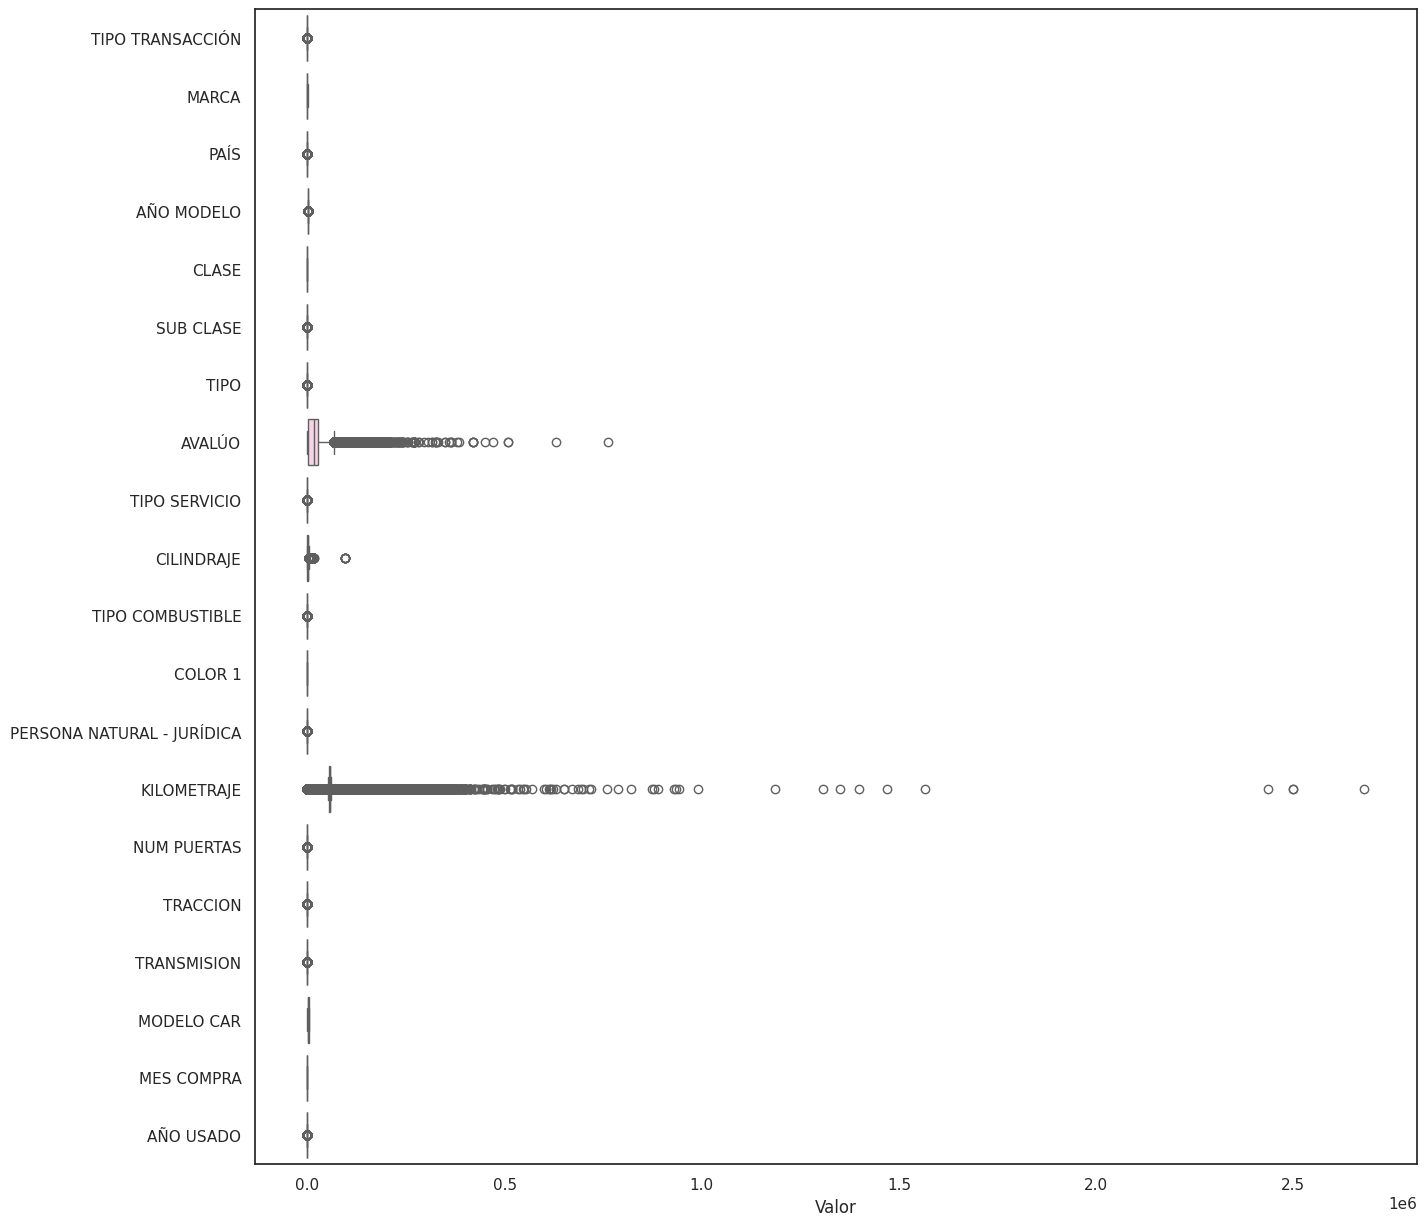

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df_le, orient='h', palette='Set3')
plt.xlabel("Valor")
plt.show()

In [ ]:
q1 = df_le['CILINDRAJE'].quantile(0.10)
q4 = df_le['CILINDRAJE'].quantile(0.90)
df_le['CILINDRAJE'][df_le['CILINDRAJE']<=q1] = q1
df_le['CILINDRAJE'][df_le['CILINDRAJE']>=q4] = q4

<ipython-input-1078-2a9cd06fae57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le['CILINDRAJE'][df_le['CILINDRAJE']<=q1] = q1
<ipython-input-1078-2a9cd06fae57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le['CILINDRAJE'][df_le['CILINDRAJE']>=q4] = q4


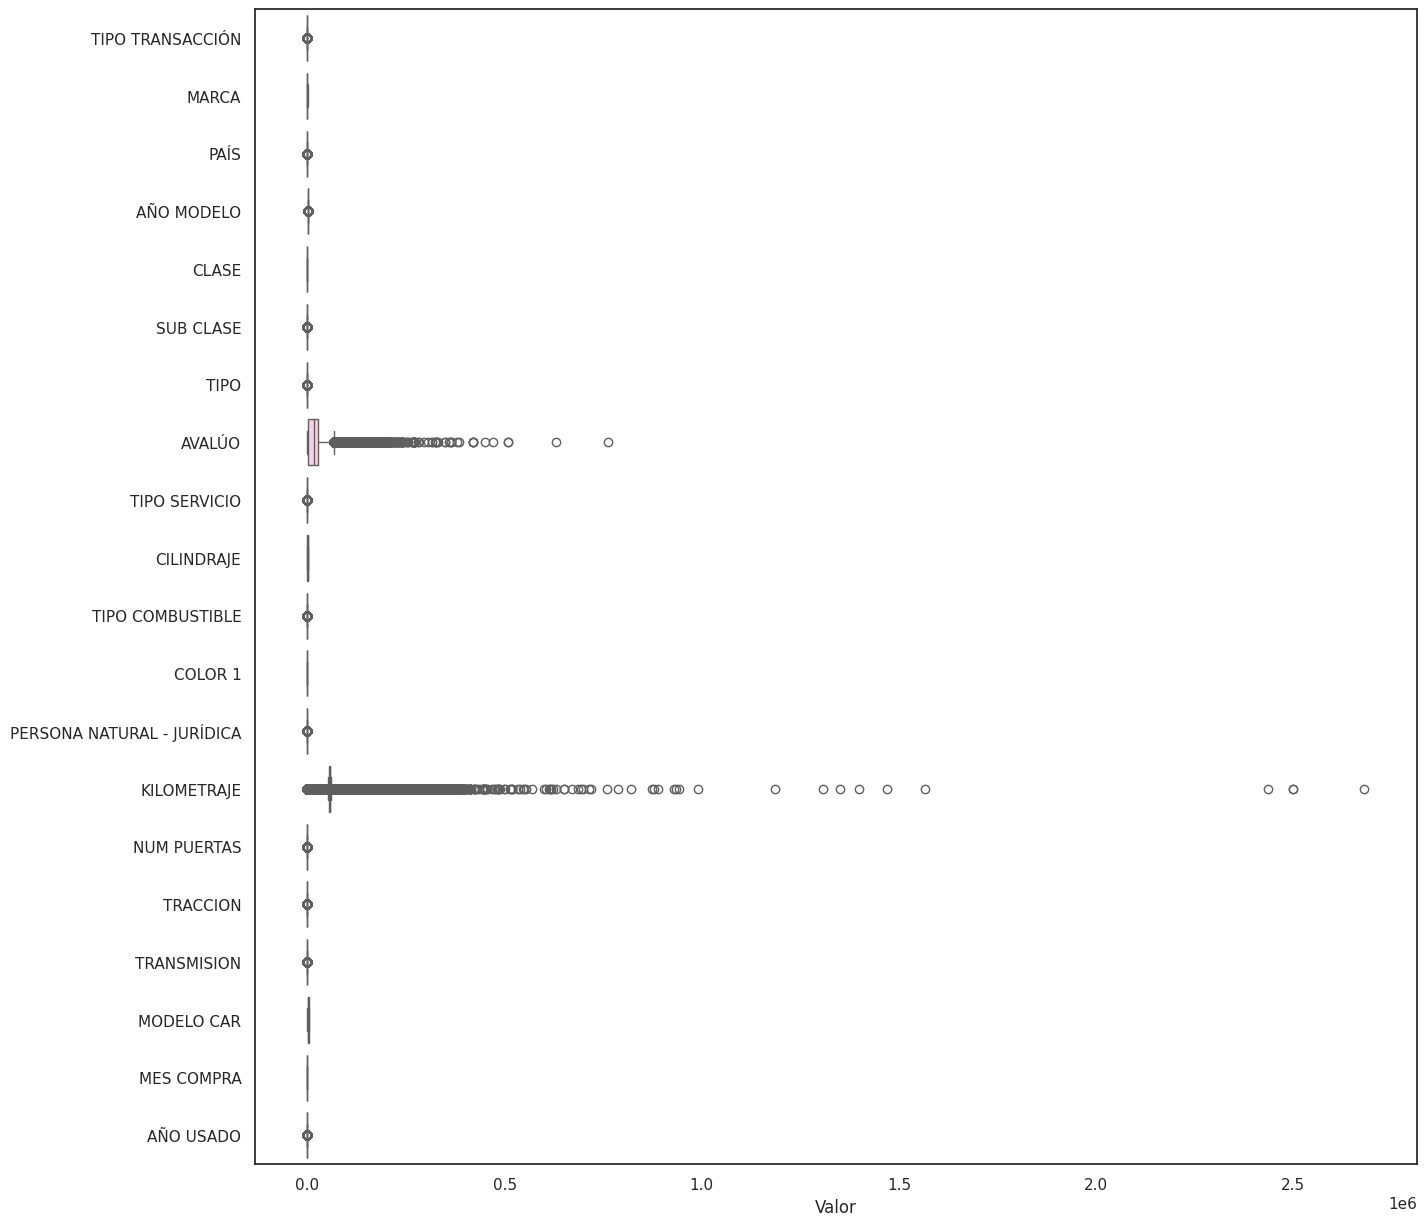

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df_le, orient='h', palette='Set3')
plt.xlabel("Valor")
plt.show()

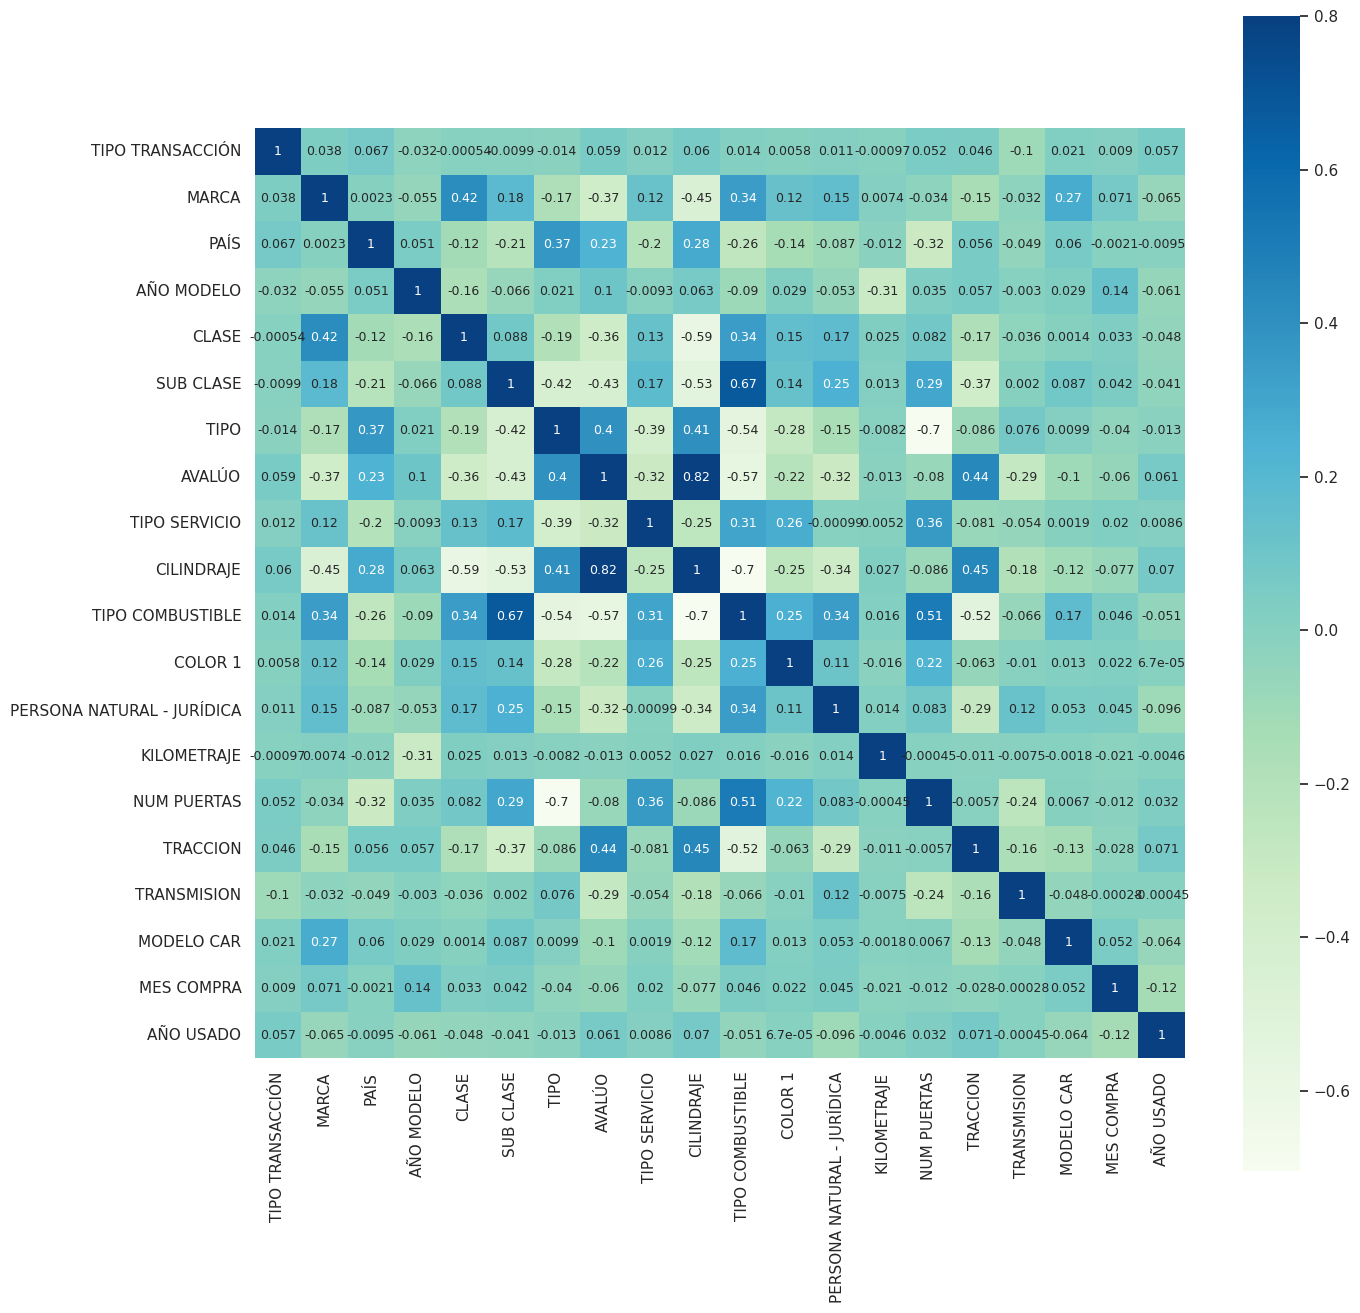

In [ ]:
sns.set(style='white',font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df_le.corr(),vmax=0.8, square=True,cmap="GnBu", linecolor='r', annot=True,annot_kws={'size':9})
plt.show()

array([[<Axes: title={'center': 'TIPO TRANSACCIÓN'}>,
        <Axes: title={'center': 'MARCA'}>,
        <Axes: title={'center': 'PAÍS'}>,
        <Axes: title={'center': 'AÑO MODELO'}>],
       [<Axes: title={'center': 'CLASE'}>,
        <Axes: title={'center': 'SUB CLASE'}>,
        <Axes: title={'center': 'TIPO'}>,
        <Axes: title={'center': 'AVALÚO'}>],
       [<Axes: title={'center': 'TIPO SERVICIO'}>,
        <Axes: title={'center': 'CILINDRAJE'}>,
        <Axes: title={'center': 'TIPO COMBUSTIBLE'}>,
        <Axes: title={'center': 'COLOR 1'}>],
       [<Axes: title={'center': 'PERSONA NATURAL - JURÍDICA'}>,
        <Axes: title={'center': 'KILOMETRAJE'}>,
        <Axes: title={'center': 'NUM PUERTAS'}>,
        <Axes: title={'center': 'TRACCION'}>],
       [<Axes: title={'center': 'TRANSMISION'}>,
        <Axes: title={'center': 'MODELO CAR'}>,
        <Axes: title={'center': 'MES COMPRA'}>,
        <Axes: title={'center': 'AÑO USADO'}>]], dtype=object)

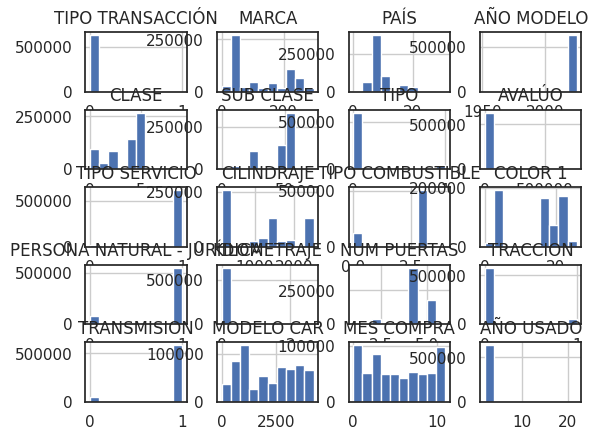

In [ ]:
df_le.hist()

# **MODELOS**
1. **RED NEURONAL**
2. **ARBOLES DE DECISION**
3. **GRADIENT BOOSTING**
4. **RANDOM FOREST**

FUNCION QUE NOS AYUDA A VER LAS METRICAS DE EVALUACION

In [ ]:
def error_acc(x_,y_,y_pred_):
  errorAbosulto = mean_absolute_error(y_,y_pred_)
  r2 = r2_score(y_, y_pred_)
  return ("Error Ab: "+str(errorAbosulto)),("ACC %: ",str((1-(errorAbosulto/np.mean(y)))*100)),("R2 SCORE %: ",str(r2))

MODELO 1

In [ ]:
X = df_le.drop('AVALÚO', axis=1)
y = df_le['AVALÚO']

In [ ]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y, test_size=0.3, random_state=5112)

In [ ]:
red_neuronal = Sequential()
red_neuronal.add(Dense(18, activation='relu'))
red_neuronal.add(Dense(14, activation='relu'))
red_neuronal.add(Dense(8, activation='relu'))
red_neuronal.add(Dense(6, activation='relu'))
red_neuronal.add(Dense(1, activation='relu'))
red_neuronal.compile(optimizer='adam', loss='mean_absolute_error')
red_neuronal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=4500, verbose=1)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 17818.0859 - val_loss: 17913.1895
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 17772.7656 - val_loss: 17520.1289
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16966.7617 - val_loss: 15418.2695
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 14334.7295 - val_loss: 10310.1885
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9177.8291 - val_loss: 6920.6157
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6341.1260 - val_loss: 5321.1025
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5084.0000 - val_loss: 4676.2578
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4487.6177 - val_loss: 4254.2100
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4129.4731 - val_loss: 3939.3108
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3814.2581 - val_loss: 3723.6082
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3596.24

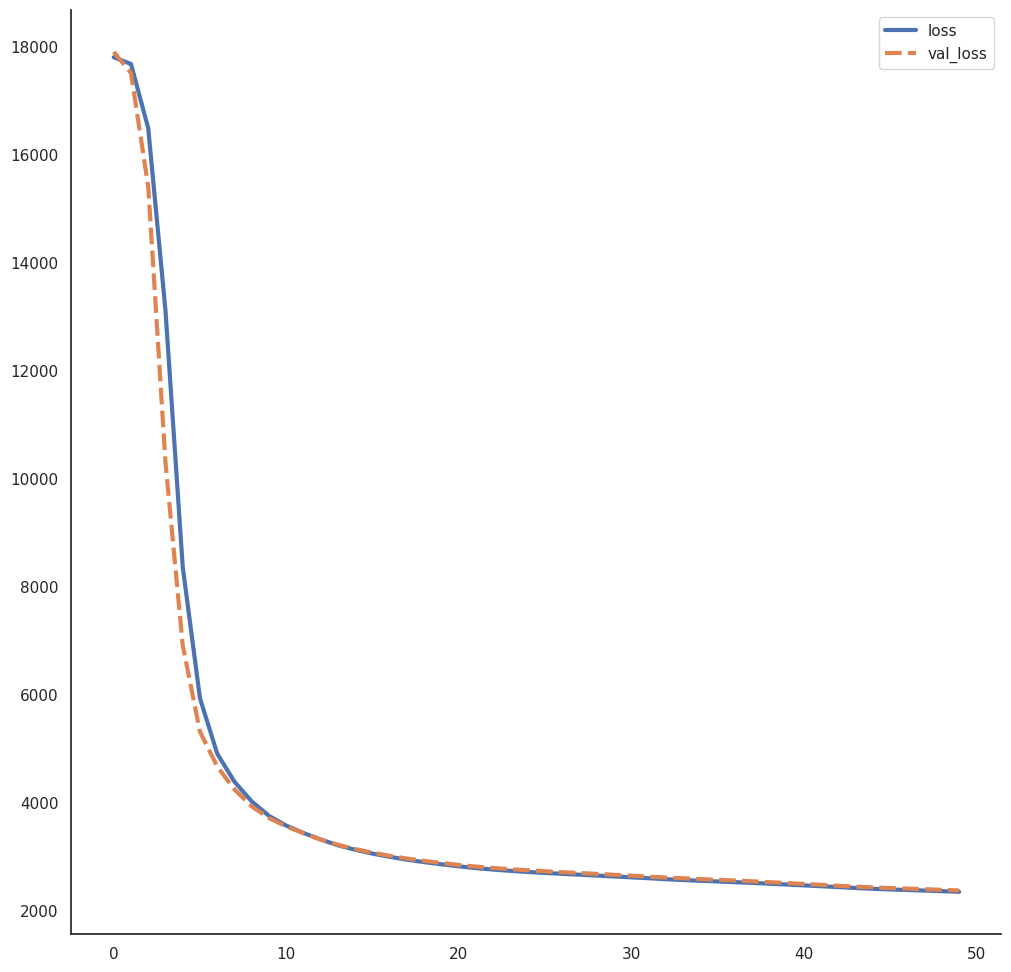

In [ ]:
loss = pd.DataFrame(red_neuronal.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
y_pred_train = red_neuronal.predict(X_train)

13999/13999 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step


In [ ]:
y_pred_test = red_neuronal.predict(X_test)

6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [ ]:
error_acc(X_train,y_train,y_pred_train)

('Error Ab: 2352.7413094431645',
 ('ACC %: ', '86.81897483476246'),
 ('R2 SCORE %: ', '0.8117684336707576'))

In [ ]:
error_acc(X_test,y_test,y_pred_test)

('Error Ab: 2382.887709513074',
 ('ACC %: ', '86.65008229380699'),
 ('R2 SCORE %: ', '0.7934796517359184'))

MODELO 2: ARBOLES DE DECISION

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
param_grid = {'max_depth': np.arange(1, 11)}

In [ ]:
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
results = grid_search.cv_results_

In [ ]:
mean_test_scores = -results['mean_test_score']
mean_train_scores = -results['mean_train_score']
max_depths = param_grid['max_depth']

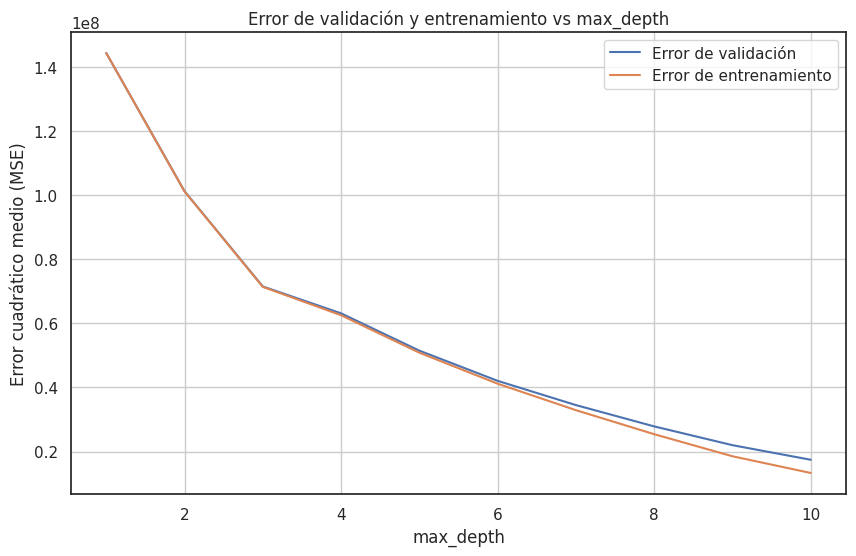

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_test_scores, label='Error de validación')
plt.plot(max_depths, mean_train_scores, label='Error de entrenamiento')
plt.xlabel('max_depth')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error de validación y entrenamiento vs max_depth')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
best_max_depth = grid_search.best_params_['max_depth']
print(f"Mejor max_depth: {best_max_depth}")

Mejor max_depth: 10


In [ ]:
modelodt = DecisionTreeRegressor(criterion='squared_error', max_depth=best_max_depth)
modelodt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
y_predic_decision_tree = modelodt.predict(X_train)

In [ ]:
error_acc(X_train,y_train,y_predic_decision_tree)

('Error Ab: 1060.4818915403532',
 ('ACC %: ', '94.05874396663677'),
 ('R2 SCORE %: ', '0.9584534117524243'))

In [ ]:
y_predic_decision_tree = modelodt.predict(X_test)

In [ ]:
error_acc(X_test,y_test,y_predic_decision_tree)

('Error Ab: 1105.8499824614853',
 ('ACC %: ', '93.80457324853442'),
 ('R2 SCORE %: ', '0.9302135166848389'))

MODELO 3: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_predict_gb = gradBooster.predict(X_train)

In [ ]:
error_acc(X_train, y_train, y_predict_gb)

('Error Ab: 1943.8628506131186',
 ('ACC %: ', '89.10968024879624'),
 ('R2 SCORE %: ', '0.9087231003576339'))

In [ ]:
y_predict_gb = gradBooster.predict(X_test)

In [ ]:
error_acc(X_test, y_test, y_predict_gb)

('Error Ab: 1968.266201564472',
 ('ACC %: ', '88.97296263274774'),
 ('R2 SCORE %: ', '0.8877003052521723'))

MODELO 4: RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelo4 = RandomForestRegressor(random_state = 3500)
modelo4.fit(X_train, y_train)
predicciones = modelo4.predict(X_train)



In [ ]:
prediccion_test = modelo4.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación del modelo
mse_train = mean_squared_error(y_train, predicciones)
#mse_test = mean_squared_error(y_train, predicciones)
mae_train = mean_absolute_error(y_train, predicciones)
#mae_test = mean_absolute_error(y_test, predicciones)
train_score = modelo4.score(X_train, y_train)
#test_score = modelo4.score(X_test, y_test)

print(f"Train Mean Squared Error (MSE): {mse_train}")
#print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Train Mean Absolute Error (MAE): {mae_train}")
#print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Train Score (R^2): {train_score}")
#print(f"Test Score (R^2): {test_score}")




Train Mean Squared Error (MSE): 913633.257985914
Train Mean Absolute Error (MAE): 58.666080241620335
Train Score (R^2): 0.9971038649431425


In [ ]:
error_acc(X_train, y_train, predicciones)

('Error Ab: 58.666080241620335',
 ('ACC %: ', '99.67132847248996'),
 ('R2 SCORE %: ', '0.9971038649431425'))

In [ ]:
error_acc(X_test, y_test, prediccion_test)

('Error Ab: 165.07735954563339',
 ('ACC %: ', '99.07516868869152'),
 ('R2 SCORE %: ', '0.9674404526642454'))

# **EVALUACION DEL MODELO**

In [ ]:
h4 = df_le.drop('AVALÚO', axis=1).iloc()[100]

In [ ]:
h4

TIPO TRANSACCIÓN                   0
MARCA                            150
PAÍS                               9
AÑO MODELO                      2023
CLASE                              1
SUB CLASE                         37
TIPO                               1
TIPO SERVICIO                      1
CILINDRAJE                      2497
TIPO COMBUSTIBLE                   0
COLOR 1                            5
PERSONA NATURAL - JURÍDICA         0
KILOMETRAJE                   102471
NUM PUERTAS                        2
TRACCION                           0
TRANSMISION                        1
MODELO CAR                      2181
MES COMPRA                         9
AÑO USADO                          2
Name: 100, dtype: int64

In [ ]:
print("Precio caro: ", df_le.iloc[100]['AVALÚO'])

Precio caro:  28268.4


In [ ]:
h4N = scaler.transform(h4.values.reshape(-1, 19))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print("Random Forest: Precio predicho-> ", modelo4.predict(h4N)[0])

Random Forest: Precio predicho->  28268.39999999995


In [ ]:
print("ANN: Precio predicho ->", red_neuronal.predict(h4N)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
ANN: Precio predicho -> [33249.08]


In [ ]:
print("Decision Tree: Precio predicho ->", modelodt.predict(h4N)[0])

Decision Tree: Precio predicho -> 50571.05197168857


In [ ]:
print("Gradient Boosting: Precio predicho ->", gradBooster.predict(h4N)[0])

Gradient Boosting: Precio predicho -> 34642.34337960454
